## Imports

In [98]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

## All Models (SI, SIS, SIR, SIRS)

In [99]:
def initialize_state(G, initial_infected):
    state = {}
    for node in G.nodes():
        if node in initial_infected:
            state[node] = 'I'
        else:
            state[node] = 'S'
    return state

In [100]:
def si_model(G, initial_infected, beta, num_steps):
    state = initialize_state(G, initial_infected)
    susceptible_count = [len(G) - len(initial_infected)]  # Initialize susceptible count
    infected_count = [len(initial_infected)]  # Initialize infected count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
        susceptible_count.append(susceptible_count[-1] - newly_infected)  # Update susceptible count
        infected_count.append(infected_count[-1] + newly_infected)  # Update infected count
    return susceptible_count, infected_count


In [101]:
def sis_model(G, initial_infected, beta, gamma, num_steps):
    state = initialize_state(G, initial_infected)
    susceptible_count = [len(G) - len(initial_infected)]  # Initialize susceptible count
    infected_count = [len(initial_infected)]  # Initialize infected count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        newly_recovered = 0  # Initialize count for newly recovered nodes in each step
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
            elif state[node] == 'I' and random.random() < gamma:
                state[node] = 'S'  # Update state of infected node to susceptible
                newly_recovered += 1  # Increment count of newly recovered nodes
        susceptible_count.append(susceptible_count[-1] - newly_infected + newly_recovered)  # Update susceptible count
        infected_count.append(infected_count[-1] + newly_infected - newly_recovered)  # Update infected count
    return susceptible_count, infected_count


In [102]:
def sir_model(G, initial_infected, beta, gamma, num_steps):
    state = initialize_state(G, initial_infected)
    susceptible_count = [len(G) - len(initial_infected)]  # Initialize susceptible count
    infected_count = [len(initial_infected)]  # Initialize infected count
    recovered_count = [0]  # Initialize recovered count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        newly_recovered = 0  # Initialize count for newly recovered nodes in each step
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
            elif state[node] == 'I' and random.random() < gamma:
                state[node] = 'R'  # Update state of infected node to recovered
                newly_recovered += 1  # Increment count of newly recovered nodes
        susceptible_count.append(susceptible_count[-1] - newly_infected)
        infected_count.append(infected_count[-1] + newly_infected - newly_recovered)
        recovered_count.append(recovered_count[-1] + newly_recovered)
    return susceptible_count, infected_count, recovered_count

In [103]:
def sirs_model(G, initial_infected, beta, gamma, mu, num_steps):
    state = initialize_state(G, initial_infected)
    susceptible_count = [len(G) - len(initial_infected)]  # Initialize susceptible count
    infected_count = [len(initial_infected)]  # Initialize infected count
    recovered_count = [0]  # Initialize recovered count
    for _ in range(num_steps):
        newly_infected = 0  # Initialize count for newly infected nodes in each step
        newly_recovered = 0  # Initialize count for newly recovered nodes in each step
        newly_susceptible = 0  # Initialize count for newly susceptible nodes in each step
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        state[node] = 'I'  # Update state of susceptible node to infected
                        newly_infected += 1  # Increment count of newly infected nodes
                        break
            elif state[node] == 'I' and random.random() < gamma:
                state[node] = 'R'  # Update state of infected node to recovered
                newly_recovered += 1  # Increment count of newly recovered nodes
            elif state[node] == 'R' and random.random() < mu:
                state[node] = 'S'  # Update state of recovered node to susceptible
                newly_susceptible += 1  # Increment count of newly susceptible nodes
        susceptible_count.append(susceptible_count[-1] + newly_susceptible - newly_infected)
        infected_count.append(infected_count[-1] + newly_infected - newly_recovered)
        recovered_count.append(recovered_count[-1] + newly_recovered)
    return susceptible_count, infected_count, recovered_count

## Random Watts Strogatz Graph Creation

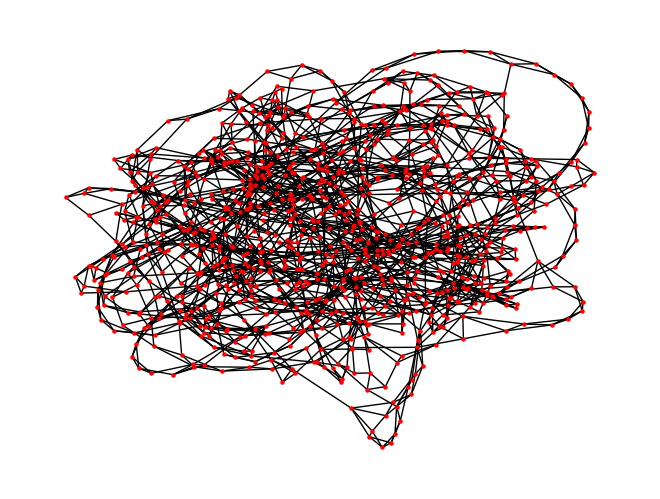

In [104]:
# Generate Watts-Strogatz graph
N = 1000  # Number of nodes
K = 4     # Average degree
p = 0.1   # Rewiring probability
G = nx.watts_strogatz_graph(N, K, p)
nx.draw(G, node_size=5, node_color='red', edge_color='black')

## Defining Parameters for Models

In [105]:
# Parameters
beta = 0.37  # Infection rate
gamma = 0.12  # Recovery rate
mu = 0.05  # Immunity loss rate
num_steps = 100

## Calculating Centralities and their highest values

In [106]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Find nodes with highest centrality for each measure
highest_degree_node = max(degree_centrality, key=degree_centrality.get)
highest_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
highest_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
highest_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

In [107]:
# Set initial infected nodes based on centrality measures
initial_infected_degree = [highest_degree_node]
initial_infected_betweenness = [highest_betweenness_node]
initial_infected_closeness = [highest_closeness_node]
initial_infected_eigenvector = [highest_eigenvector_node]

## Highest Degree Centrality Node as initial infected

In [108]:
# Simulate epidemic models
si_infected = si_model(G, initial_infected_degree, beta, num_steps)
sis_infected = sis_model(G, initial_infected_degree, beta, gamma, num_steps)
sir_infected = sir_model(G, initial_infected_degree, beta, gamma, num_steps)
sirs_infected = sirs_model(G, initial_infected_degree, beta, gamma, mu, num_steps)

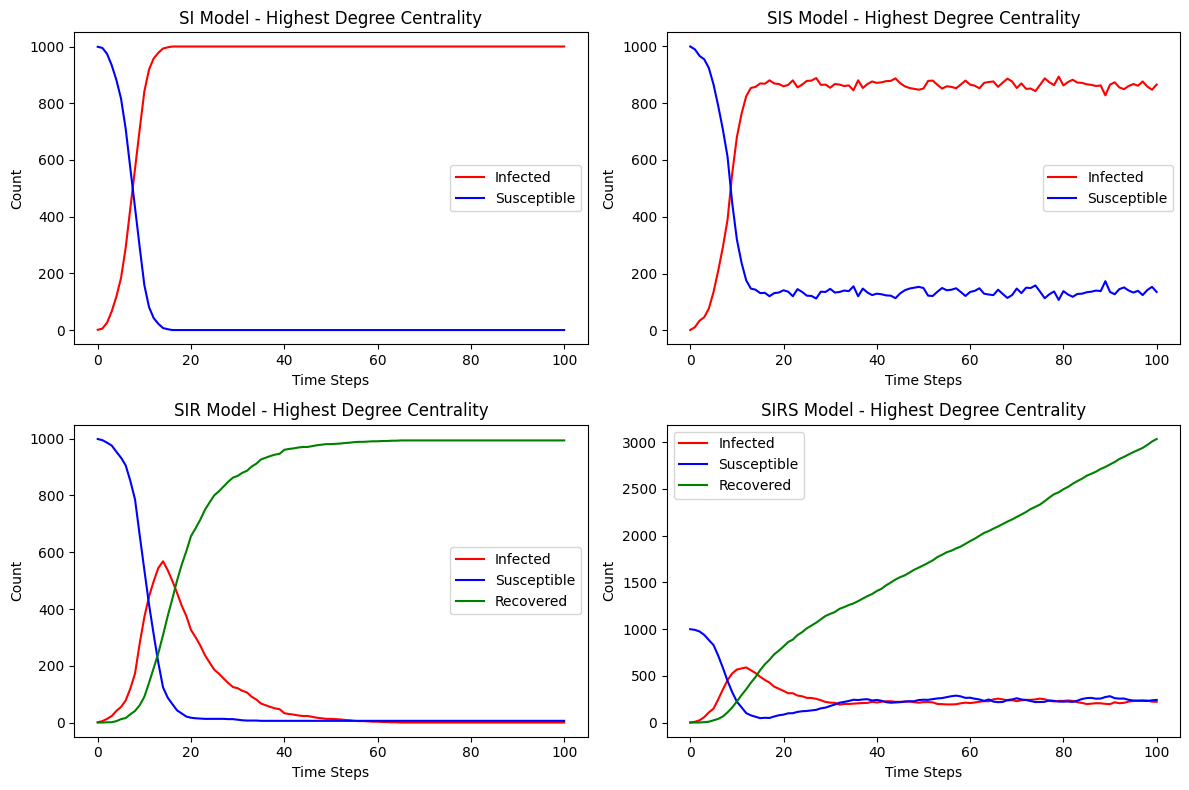

In [109]:
# Plotting
steps = list(range(num_steps + 1))
plt.figure(figsize=(12, 8))

# SI model
plt.subplot(2, 2, 1)
si_susceptible, si_infected = si_model(G, initial_infected_degree, beta, num_steps)
plt.plot(steps, si_infected, label='Infected', color='red')
plt.plot(steps, si_susceptible, label='Susceptible', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SI Model - Highest Degree Centrality')
plt.legend()

# SIS model
plt.subplot(2, 2, 2)
sis_susceptible, sis_infected = sis_model(G, initial_infected_degree, beta, gamma, num_steps)
plt.plot(steps, sis_infected, label='Infected', color='red')
plt.plot(steps, sis_susceptible, label='Susceptible', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIS Model - Highest Degree Centrality')
plt.legend()

# SIR model
plt.subplot(2, 2, 3)
sir_susceptible, sir_infected, sir_recovered = sir_model(G, initial_infected_degree, beta, gamma, num_steps)
plt.plot(steps, sir_infected, label='Infected', color='red')
plt.plot(steps, sir_susceptible, label='Susceptible', color='blue')
plt.plot(steps, sir_recovered, label='Recovered', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIR Model - Highest Degree Centrality')
plt.legend()

# SIRS model
plt.subplot(2, 2, 4)
sirs_susceptible, sirs_infected, sirs_recovered = sirs_model(G, initial_infected_degree, beta, gamma, mu, num_steps)
plt.plot(steps, sirs_infected, label='Infected', color='red')
plt.plot(steps, sirs_susceptible, label='Susceptible', color='blue')
plt.plot(steps, sirs_recovered, label='Recovered', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIRS Model - Highest Degree Centrality')
plt.legend()

plt.tight_layout()
plt.show()

## Highest Betweenness Centrality Node as initial infected

In [110]:
# Simulate epidemic models
si_infected = si_model(G, initial_infected_betweenness, beta, num_steps)
sis_infected = sis_model(G, initial_infected_betweenness, beta, gamma, num_steps)
sir_infected = sir_model(G, initial_infected_betweenness, beta, gamma, num_steps)
sirs_infected = sirs_model(G, initial_infected_betweenness, beta, gamma, mu, num_steps)

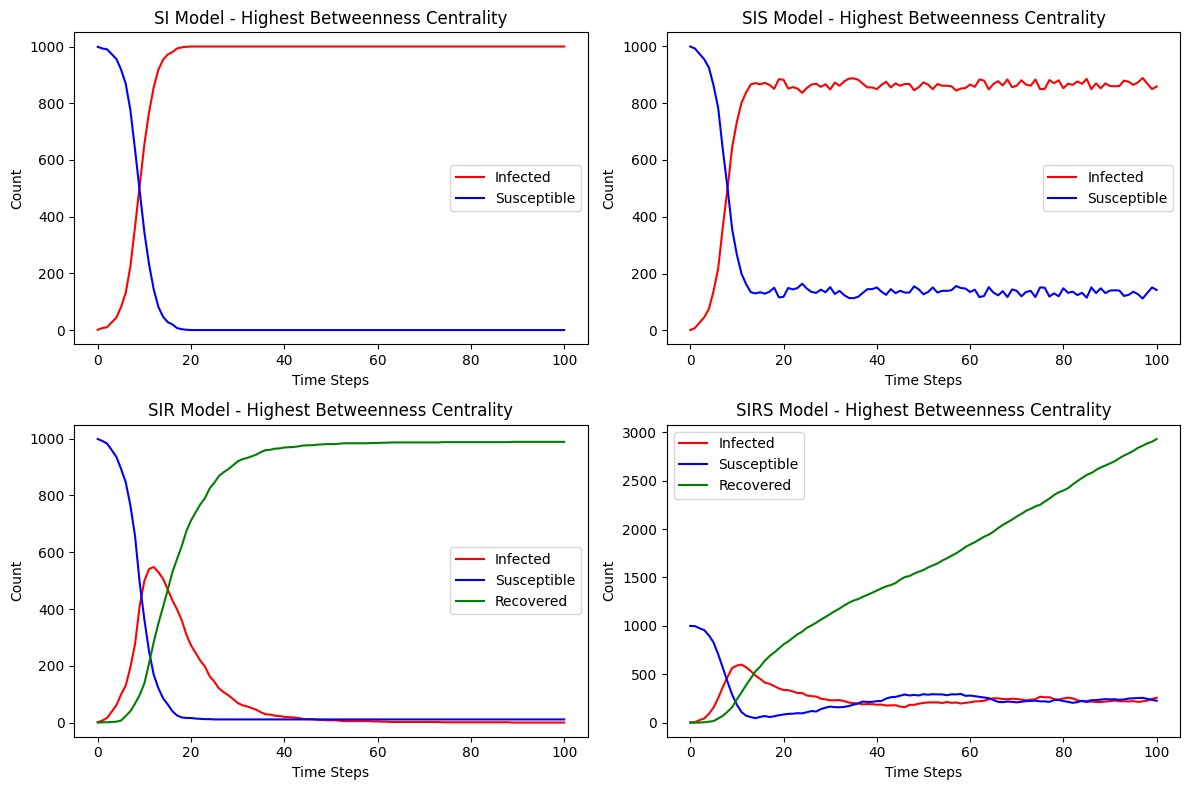

In [111]:
# Plotting
steps = list(range(num_steps + 1))
plt.figure(figsize=(12, 8))

# SI model
plt.subplot(2, 2, 1)
si_susceptible, si_infected = si_model(G, initial_infected_betweenness, beta, num_steps)
plt.plot(steps, si_infected, label='Infected', color='red')
plt.plot(steps, si_susceptible, label='Susceptible', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SI Model - Highest Betweenness Centrality')
plt.legend()

# SIS model
plt.subplot(2, 2, 2)
sis_susceptible, sis_infected = sis_model(G, initial_infected_betweenness, beta, gamma, num_steps)
plt.plot(steps, sis_infected, label='Infected', color='red')
plt.plot(steps, sis_susceptible, label='Susceptible', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIS Model - Highest Betweenness Centrality')
plt.legend()

# SIR model
plt.subplot(2, 2, 3)
sir_susceptible, sir_infected, sir_recovered = sir_model(G, initial_infected_betweenness, beta, gamma, num_steps)
plt.plot(steps, sir_infected, label='Infected', color='red')
plt.plot(steps, sir_susceptible, label='Susceptible', color='blue')
plt.plot(steps, sir_recovered, label='Recovered', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIR Model - Highest Betweenness Centrality')
plt.legend()

# SIRS model
plt.subplot(2, 2, 4)
sirs_susceptible, sirs_infected, sirs_recovered = sirs_model(G, initial_infected_betweenness, beta, gamma, mu, num_steps)
plt.plot(steps, sirs_infected, label='Infected', color='red')
plt.plot(steps, sirs_susceptible, label='Susceptible', color='blue')
plt.plot(steps, sirs_recovered, label='Recovered', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIRS Model - Highest Betweenness Centrality')
plt.legend()

plt.tight_layout()
plt.show()

## Highest Closeness Centrality Node as initial infected

In [112]:
# Simulate epidemic models
si_infected = si_model(G, initial_infected_closeness, beta, num_steps)
sis_infected = sis_model(G, initial_infected_closeness, beta, gamma, num_steps)
sir_infected = sir_model(G, initial_infected_closeness, beta, gamma, num_steps)
sirs_infected = sirs_model(G, initial_infected_closeness, beta, gamma, mu, num_steps)

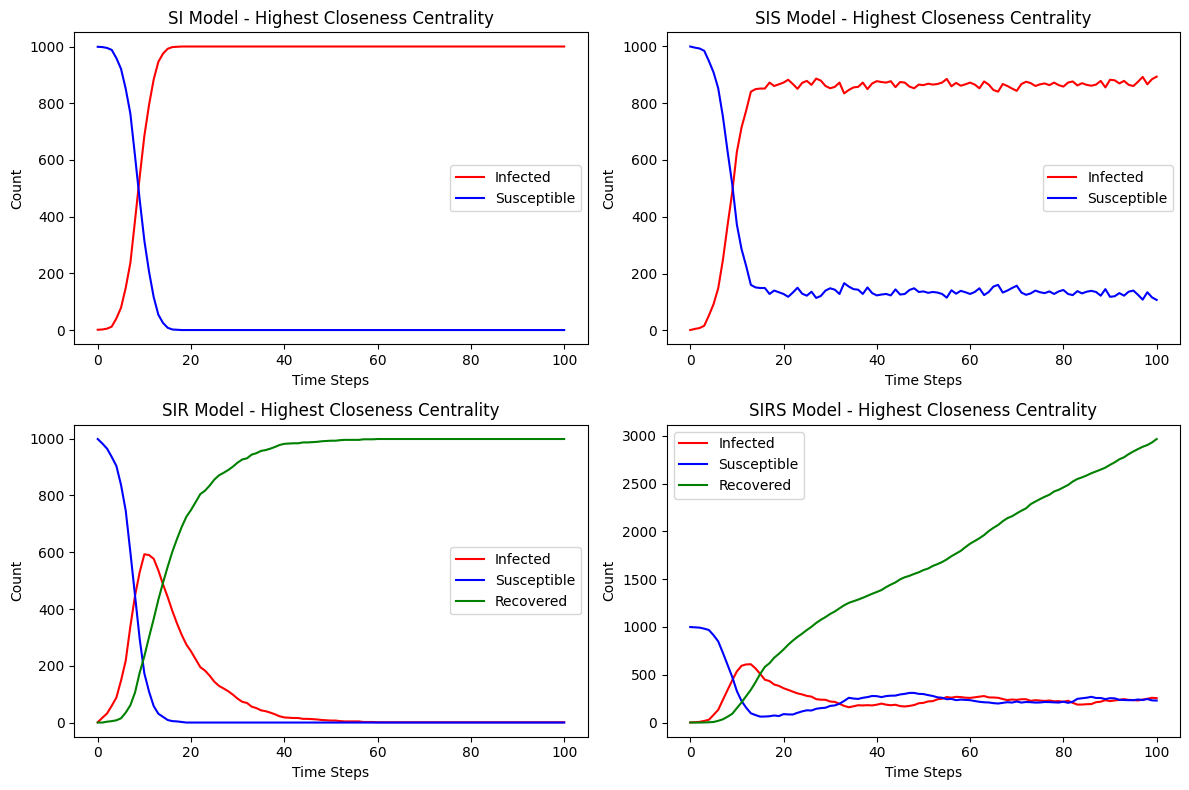

In [113]:
# Plotting
steps = list(range(num_steps + 1))
plt.figure(figsize=(12, 8))

# SI model
plt.subplot(2, 2, 1)
si_susceptible, si_infected = si_model(G, initial_infected_closeness, beta, num_steps)
plt.plot(steps, si_infected, label='Infected', color='red')
plt.plot(steps, si_susceptible, label='Susceptible', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SI Model - Highest Closeness Centrality')
plt.legend()

# SIS model
plt.subplot(2, 2, 2)
sis_susceptible, sis_infected = sis_model(G, initial_infected_closeness, beta, gamma, num_steps)
plt.plot(steps, sis_infected, label='Infected', color='red')
plt.plot(steps, sis_susceptible, label='Susceptible', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIS Model - Highest Closeness Centrality')
plt.legend()

# SIR model
plt.subplot(2, 2, 3)
sir_susceptible, sir_infected, sir_recovered = sir_model(G, initial_infected_closeness, beta, gamma, num_steps)
plt.plot(steps, sir_infected, label='Infected', color='red')
plt.plot(steps, sir_susceptible, label='Susceptible', color='blue')
plt.plot(steps, sir_recovered, label='Recovered', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIR Model - Highest Closeness Centrality')
plt.legend()

# SIRS model
plt.subplot(2, 2, 4)
sirs_susceptible, sirs_infected, sirs_recovered = sirs_model(G, initial_infected_closeness, beta, gamma, mu, num_steps)
plt.plot(steps, sirs_infected, label='Infected', color='red')
plt.plot(steps, sirs_susceptible, label='Susceptible', color='blue')
plt.plot(steps, sirs_recovered, label='Recovered', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIRS Model - Highest Closeness Centrality')
plt.legend()

plt.tight_layout()
plt.show()

## Highest Eigenvector Centrality Node as initial infected

In [114]:
# Simulate epidemic models
si_infected = si_model(G, initial_infected_eigenvector, beta, num_steps)
sis_infected = sis_model(G, initial_infected_eigenvector, beta, gamma, num_steps)
sir_infected = sir_model(G, initial_infected_eigenvector, beta, gamma, num_steps)
sirs_infected = sirs_model(G, initial_infected_eigenvector, beta, gamma, mu, num_steps)

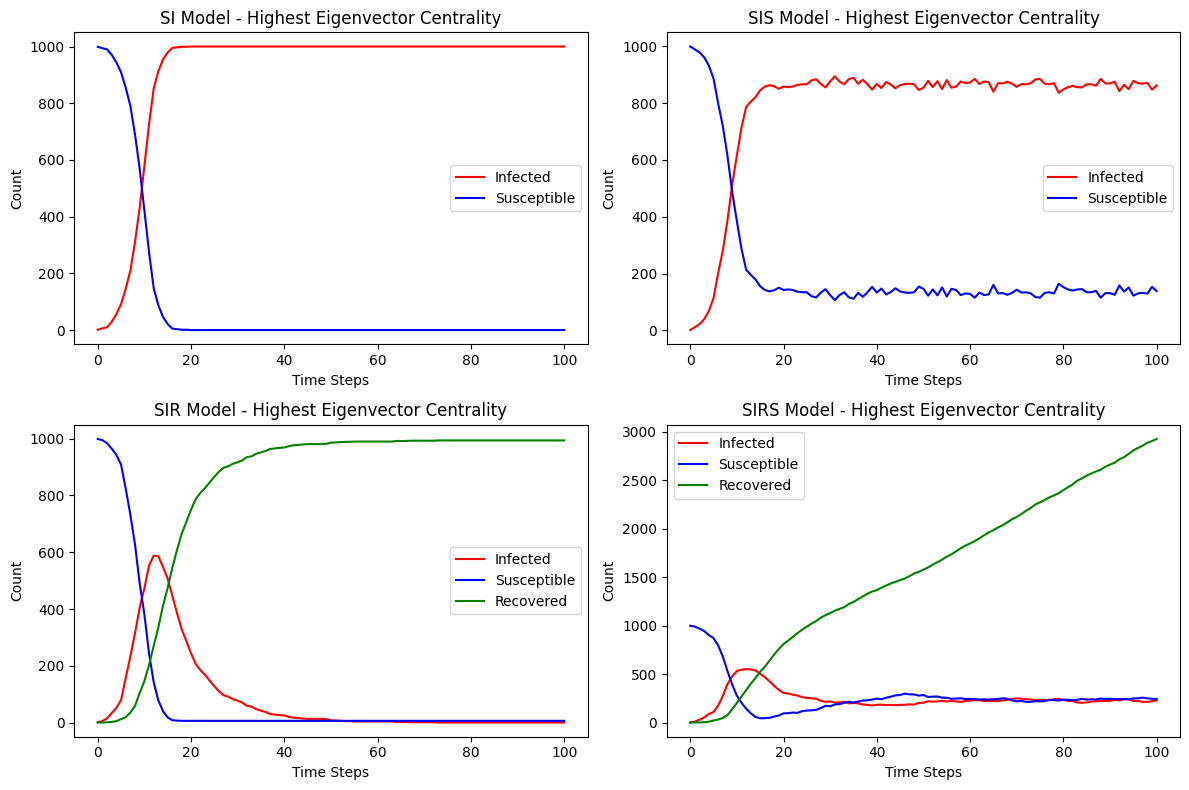

In [115]:
# Plotting
steps = list(range(num_steps + 1))
plt.figure(figsize=(12, 8))

# SI model
plt.subplot(2, 2, 1)
si_susceptible, si_infected = si_model(G, initial_infected_eigenvector, beta, num_steps)
plt.plot(steps, si_infected, label='Infected', color='red')
plt.plot(steps, si_susceptible, label='Susceptible', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SI Model - Highest Eigenvector Centrality')
plt.legend()

# SIS model
plt.subplot(2, 2, 2)
sis_susceptible, sis_infected = sis_model(G, initial_infected_eigenvector, beta, gamma, num_steps)
plt.plot(steps, sis_infected, label='Infected', color='red')
plt.plot(steps, sis_susceptible, label='Susceptible', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIS Model - Highest Eigenvector Centrality')
plt.legend()

# SIR model
plt.subplot(2, 2, 3)
sir_susceptible, sir_infected, sir_recovered = sir_model(G, initial_infected_eigenvector, beta, gamma, num_steps)
plt.plot(steps, sir_infected, label='Infected', color='red')
plt.plot(steps, sir_susceptible, label='Susceptible', color='blue')
plt.plot(steps, sir_recovered, label='Recovered', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIR Model - Highest Eigenvector Centrality')
plt.legend()

# SIRS model
plt.subplot(2, 2, 4)
sirs_susceptible, sirs_infected, sirs_recovered = sirs_model(G, initial_infected_eigenvector, beta, gamma, mu, num_steps)
plt.plot(steps, sirs_infected, label='Infected', color='red')
plt.plot(steps, sirs_susceptible, label='Susceptible', color='blue')
plt.plot(steps, sirs_recovered, label='Recovered', color='green')
plt.xlabel('Time Steps')
plt.ylabel('Count')
plt.title('SIRS Model - Highest Eigenvector Centrality')
plt.legend()

plt.tight_layout()
plt.show()